# Fitting GNSS time-series

## Finding Location and Velocity data

In this part of the lab we will learn about accessing GNSS time-series and velocity data. GNSS data is publicly available from __[UNAVCO](https://www.unavco.org/)__, a non-profit university-governed consortium that facilitates geoscience research and education using geodesy, and from the University of Nevada-Reno's __[MAGNET](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html)__ database. In this homework, you will download, plot, and analyze GNSS time-series from several stations. 

Original activity by Vince Cronin (Baylor University). Revisions by Beth Pratt-Sitaula (UNAVCO) and Jeremy Maurer (Missouri S&T).

*Analyzing the velocities recorded at different GPS stations can give significant insights into plate tectonic motion, earthquake hazards, volcanic hazards, groundwater removal, and more.*

GPS data can be acquired from a variety of different research groups around the world, but some the most accessible and easy to use GPS data is continous data from the [Nevada Geodetic Laboratory](http://geodesy.unr.edu/index.php). 
You can access there data holdings [here](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html). 

## Raw GNSS data
In this lab we will not work with the raw GNSS data; this is because GNSS data for tectonic purposes is usually processed as a *network*, meaning a group of stations are processed all at once to obtain position information. This is different than what your phone or a typical GNSS receiver does, which is to estimate your position based on a single receiver. Network processing allows for much more precise positioning, because it allows the processing algorithm to solve for certain noise sources that are common to all stations and subtract it out. The image below shows an example of a Rinex file for GNSS station "CAPO" located in Haiti using a Trimble-brand GNSS receiver.
![Rinex_file](https://raw.githubusercontent.com/jlmaurer/GE6146/master/notebooks/images/Rinex_file_example.png)

[This link](https://observablehq.com/@earthscope/gnss-data-access?stations=%5B%22%22%5D&polygons=%7B%222d1b5ff0de7d0b62f6d12d23f3926612%22%3A%5B%5B-92.81370714148517%2C17.81371419134429%5D%2C%5B-88.03749150518303%2C18.056315555126048%5D%2C%5B-88.59429223683497%2C12.388274685195654%5D%2C%5B-92.61847094848122%2C13.721342747621904%5D%2C%5B-92.81370714148517%2C17.81371419134429%5D%5D%7D&rinex2Selections=%5B%22obs%22%5D&rinex3Selections=%5B%22obs%22%5D&referenceFrames=%5B%5D&analysisCenters=%5B%5D&sampleIntervalSelection=%5B%22%3E1%22%5D&antennaSelection=null&receiverSelection=null&radomeSelection=null&startDate=%221994-01-01T00%3A00%3A00.000Z%22&endDate=%222023-08-28T00%3A00%3A00.000Z%22) shows an example of all GNSS data (campaign and continuous) available in Guatemala from the EarthScope Consortium. 

## GNSS time-series
Most GNSS applications, including the earth sciences, use position time-series. The plot below shows an example time-series for station (P595) in California, near where the 2019 Ridgecrest earthquake occurred. The time-series shows the point location relative to the initial starting point for each day. GNSS records data continously, but the data are typically averaged to one position per day to reduce noise. The time-series provides several types of useful information. First, the points change at a fairly constant rate; in the plot, you can see that the position of the GNSS station moves west (negative east) at a rate of approximately 7 mm/yr, and north at approximately 10 mm/yr. The data shows a fairly constant rate of change until an event, which in this case is the Ridgecrest earthquake. You also see that the vertical motion is much noisier and has
a much lower rate (the slope of the average trend is small).
![P595.png](https://raw.githubusercontent.com/jlmaurer/GE6146/master/notebooks/images/P595.png)

## Detrended Time-series
The next image shows a de-trended time-series, where the average rate has been subtracted from each day's point. The detrended time-series shows the total offset from the earthquake Ridgecrest earthquake, and it shows that the displacements after the earthquake are not zero right away, but there are some transients that take some time to dissipate.
![P595_detrended.png](https://raw.githubusercontent.com/jlmaurer/GE6146/master/notebooks/images/P595_detrended.png)

## Try it yourself

Navigate to the [UNR MAGNET website](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap.html), find station [GUAT located in Guatemala City](http://geodesy.unr.edu/NGLStationPages/stations/GUAT.sta), click on that station and look at the data. 

It is important to select the appropriate reference frame when looking at GNSS velocities. 
A station in a North-America reference frame will have a different velocity compared to the same station in a Caribbean reference frame, for example. Try looking at the time-series for GUAT in several different reference frames on the UNR MAGNET website. 

## Accessing GNSS time-series data from continuous and semi-continuous stations
We will access publicly-available data that has already been processed up to the time-series level. This time-series data contains one position point in three dimensions for a given station on a daily frequency. The data is available from several different sources, including the __[University of Nevada at Reno](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html)__ and __[UNAVCO](https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html)__; the latter has data from several different sources. Using data already pre-processed will save a lot of time for this lab, but be aware that each processing agency has its own set of stations and quirks that must be investigated for real research-level work.

In [2]:
# First import the libraries and set up some helpful functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# some helpful functions
def cosd(angle_in_degrees):
    return np.cos(np.radians(angle_in_degrees))
def sind(angle_in_degrees):
    return np.sin(np.radians(angle_in_degrees))

In [3]:
# We will need these libraries to run this notebook
# !pip install pyproj #<-- Uncomment and run this once at the beginning of running this section of the notebook

In [10]:
# Load the GUAT GNSS time-series
# data_file = 'https://github.com/jlmaurer/gemlab/blob/c9f303fc1252881d84a1883915c90c3d937dff49/software/tutorials/data/GUAT.NA.tenv3.txt'
data_file = 'data/GUAT.NA.tenv3.txt'
gnss_ts = pd.read_csv(data_file, delim_whitespace=True).set_index('YYMMMDD')

In order to understand and use the file a bit more easily, let's convert to friendlier column names. 

In [18]:
guat = gnss_ts[['yyyy.yyyy', '__east(m)', '_north(m)', '____up(m)', 'sig_e(m)', 'sig_n(m)', 'sig_u(m)']]

In [19]:
# Your code here

In [20]:
# Look at the data
guat.head()

,yyyy.yyyy,__east(m),_north(m),____up(m),sig_e(m),sig_n(m),sig_u(m)
YYMMMDD,,,,,,,
00JUL28,2000.5722,-0.780372,0.130760,0.850614,0.001046,0.000898,0.004067
00JUL29,2000.5749,-0.779355,0.133905,0.852540,0.001014,0.000845,0.003770
00JUL30,2000.5777,-0.776256,0.130483,0.851777,0.001036,0.000905,0.004071
00JUL31,2000.5804,-0.778243,0.130576,0.858340,0.000932,0.000815,0.003708
00AUG01,2000.5832,-0.782824,0.134738,0.854636,0.001041,0.000889,0.003909


Text(0, 0.5, 'Displacement (m)')

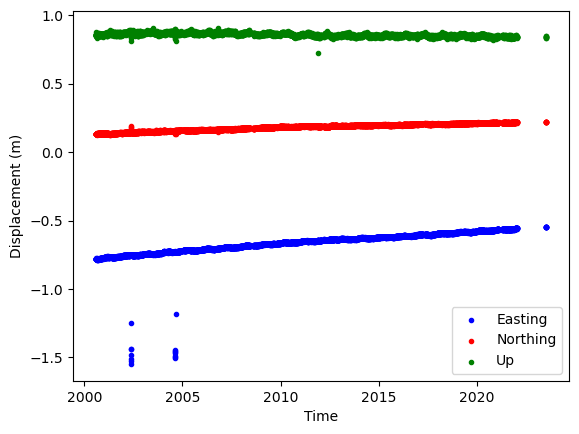

In [23]:
# plot the easting, northing, and up components of the data
plt.scatter(guat['yyyy.yyyy'], guat['__east(m)'], c='b', marker='.', label='Easting')
plt.scatter(guat['yyyy.yyyy'], guat['_north(m)'], c='r', marker='.', label='Northing')
plt.scatter(guat['yyyy.yyyy'], guat['____up(m)'], c='g', marker='.', label='Up')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Displacement (m)')

## Modeling GNSS time-series

A standard model for GNSS time-series data is a long-term trend, an offset, and seasonal terms. We can use the following function to fit the coefficients of this linear model. 

In [41]:
def linear_ts_model(x, t):
    '''Predict a time-series that includes linear and seasonal terms'''
    return x[0] + x[1] * t + x[2] * np.cos(t) + x[3] * np.sin(t) + x[4] * np.cos(t/2) + x[5] * np.sin(t/2)

def fit_ts(t, y):
    '''Fit coefficients to a linear time-series model'''
    
    # First need to remove nans
    mask1 = np.isnan(t)
    t = t[~mask1]
    y = y[~mask1]
    
    mask2 = np.isnan(y)
    tg = t[~mask2].ravel()
    yg = y[~mask2].ravel()
    
    # Create a matrix of t-values and trig functions
    G = np.stack([np.ones(len(yg)), tg, np.cos(tg), np.sin(tg), np.cos(2*tg), np.sin(2*tg)], axis=-1)
    mhat = np.linalg.lstsq(G, yg, rcond=None)[0]
    
    Gpred = np.stack([np.ones(len(t)), t, np.cos(t), np.sin(t), np.cos(2*t), np.sin(2*t)], axis=-1)
    ypred = np.dot(Gpred, mhat)
    
    yresid = y - ypred
    
    rmse = np.sqrt(np.sum(np.square(yresid)))
    
    return mhat, rmse, ypred, yresid

In [42]:
# we have to fit each component separately
mhat, rmse, ypred, yresid = fit_ts(guat['yyyy.yyyy'].values, guat['__east(m)'].values)

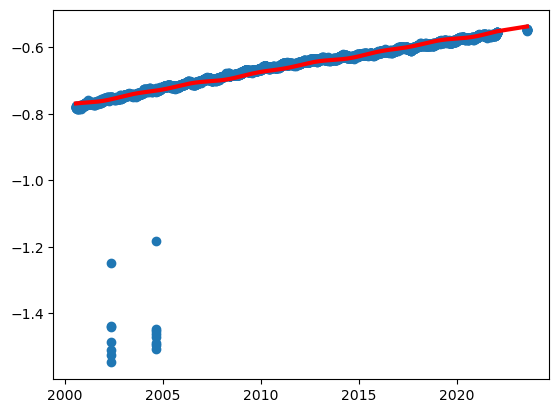

In [54]:
plt.scatter(guat['yyyy.yyyy'].values, guat['__east(m)'].values)
plt.plot(guat['yyyy.yyyy'].values, ypred, c='r', linewidth=3)

In [49]:
# let's look at the trend term
print('Velocity of GUAT, Easting component, is {:.1f} mm/yr'.format(mhat[1]*1000))

Velocity of GUAT, Easting component, is 10.2 mm/yr


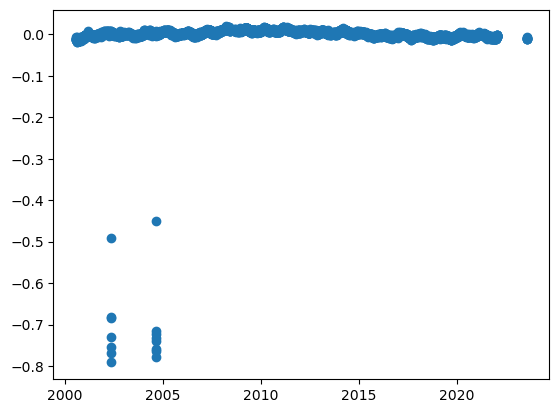

In [56]:
# let's look at the residuals
plt.scatter(guat['yyyy.yyyy'].values, yresid)

In [57]:
# let's remove the outliers so we can see what's going on more clearly
yresid_clean = yresid
yresid_clean[yresid_clean <-.1] = np.nan

Text(0, 0.5, 'Residual displacement (m)')

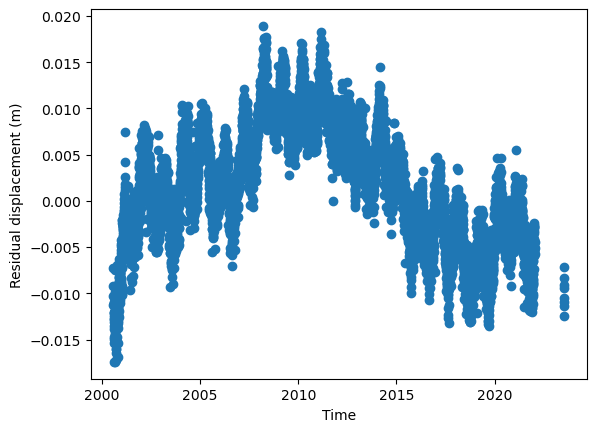

In [64]:
plt.scatter(guat['yyyy.yyyy'].values, yresid)
plt.xlabel('Time')
plt.ylabel('Residual displacement (m)')

From this plot, it is clear that there is a change in the velocity happening around 2009. There was a large earthquake near the Swan Islands in 2009, let's see how that compares. 

Text(0, 0.5, 'Residual displacement (m)')

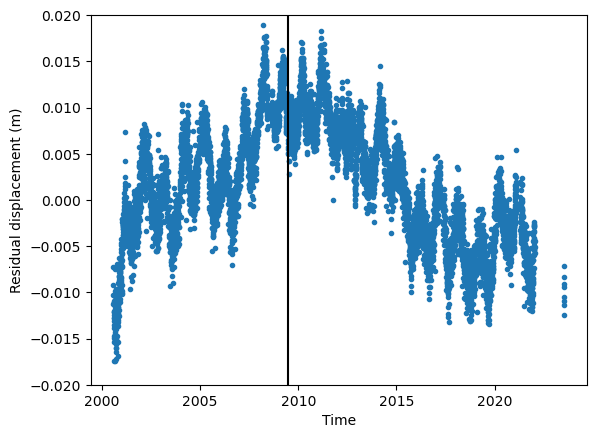

In [68]:
# date of the earthquake: 2009-05-28 08:24:46 UTC
frac_year_swan_islands = 2009.49

plt.scatter(guat['yyyy.yyyy'].values, yresid, marker='.')
plt.plot([frac_year_swan_islands, frac_year_swan_islands], [-0.025, 0.025], 'k')
plt.ylim([-0.02, 0.02])
plt.xlabel('Time')
plt.ylabel('Residual displacement (m)')

It seems likely that this earthquake may be the cause of the change in velocity at this station. To do a better job, we should divide the time period into two (or perhaps three) intervals and fit a velocity to each segment separately. Note that the velocity seems like it may be returning back to the older velocity in the most recent period. Once more data comes in we'll be able to verify whether this is the case. 

In [50]:
# Let's repeat the trend analysis for the Northing and vertical components

In [51]:
# Your code here